# Metrics Examples

**Note: this is a legacy notebook, written for `qp` version < 1, and may not be 100% accurate for `qp` version >= 1. It is kept available for reference.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import qp
import qp.metrics

"""
When producing random variates from distributions contained in an Ensemble object
rvs_size specifies the number of variates to produce, and random_state ensures
reproducibility for this notebook.
"""
rvs_size = 100
random_state = 42

The following line produces an Ensemble object that contains 11 normal distributions. The mean and sigma are different for each.

In [2]:
number_of_distributions = 3

locs_1 = 2* (np.random.uniform(size=(number_of_distributions,1)))
scales_1 = 1 + 0.2*(np.random.uniform(size=(number_of_distributions,1)))
ens_r_1 = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs_1, scale=scales_1))

locs_2 = 2* (np.random.uniform(size=(number_of_distributions,1)))
scales_2 = 1 + 0.2*(np.random.uniform(size=(number_of_distributions,1)))
ens_r_2 = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs_2, scale=scales_2))

Calculate the Kolmogorov-Smirnov statistic between each pair of distributions in two Ensembles. 

In [3]:
output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ks', # 'ks' = Kolmogorov-Smirnov. 'ad' for Anderson-Darling and 'cvm' for Cramer-von Mises are also available.
            num_samples=rvs_size,
            _random_state=random_state
        )

Plot the PDFs along with the resulting Kolmogorov-Smirnov statistics

/home/jscora/software/anaconda3/envs/qp/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:8778: RuntimeWarning: invalid value encountered in log
  return np.log(r) - 0.5 * r * r


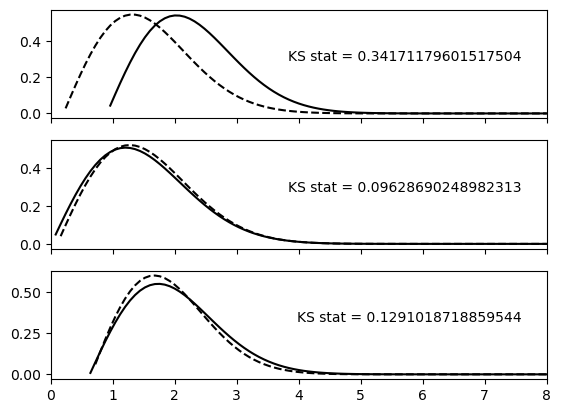

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.5, f'KS stat = {output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='black')
_ = qp.plotting.plot_native(ens_r_2[0], axes=ax0, color='black', linestyle='dashed')

ax1.text(0.95, 0.5, f'KS stat = {output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='black')
_ = qp.plotting.plot_native(ens_r_2[1], axes=ax1, color='black', linestyle='dashed')

ax2.text(0.95, 0.5, f'KS stat = {output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='black')
_ = qp.plotting.plot_native(ens_r_2[2], axes=ax2, color='black', linestyle='dashed')



Similarly Anderson-Darling and Cramer-von Mises statistics can be calculated.

In [5]:
ad_output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ad', # 'ad' = Anderson-Darling
            num_samples=rvs_size,
            _random_state=random_state
        )

cvm_output = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='cvm', # 'cvm' = Cramer-von Mises
            num_samples=rvs_size,
            _random_state=random_state
        )

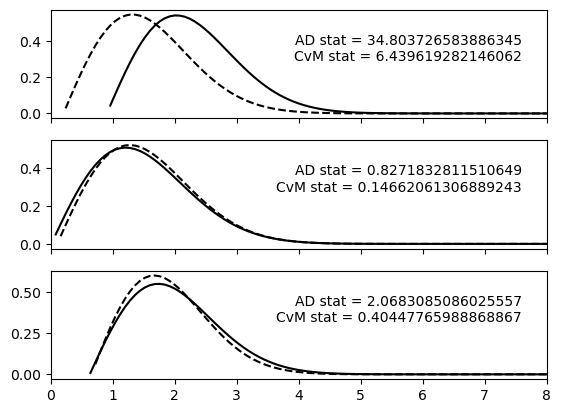

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.65, f'AD stat = {ad_output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.5, f'CvM stat = {cvm_output[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='black')
_ = qp.plotting.plot_native(ens_r_2[0], axes=ax0, color='black', linestyle='dashed')

ax1.text(0.95, 0.65, f'AD stat = {ad_output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.5, f'CvM stat = {cvm_output[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='black')
_ = qp.plotting.plot_native(ens_r_2[1], axes=ax1, color='black', linestyle='dashed')

ax2.text(0.95, 0.65, f'AD stat = {ad_output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.5, f'CvM stat = {cvm_output[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='black')
_ = qp.plotting.plot_native(ens_r_2[2], axes=ax2, color='black', linestyle='dashed')

In addition to Ensemble vs.0 Ensemble pair-wise calculations, we can compare an Ensemble containing N distributions against an Ensemble containing 1 distribution. We'll create an Ensemble containing a single distribution, and then calculate the various statistics.

In [7]:
locs = 2* (np.random.uniform(size=(1,1)))
scales = 1 + 0.2*(np.random.uniform(size=(1,1)))
ens_r_single = qp.Ensemble(qp.stats.rayleigh, data=dict(loc=locs, scale=scales))

print("Number of distributions in ens_r_2: " + str(ens_r_single.npdf))

Number of distributions in ens_r_2: 1


Note that when comparing Ensemble(N) vs. Ensemble(1), the Ensemble containing 1 distribution should be the second argument passed to the function.

In [8]:
ad_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )

cvm_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='cvm',
            num_samples=rvs_size,
            _random_state=random_state
        )

ks_output_vs_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_single,
            fit_metric='ks',
            num_samples=rvs_size,
            _random_state=random_state
        )

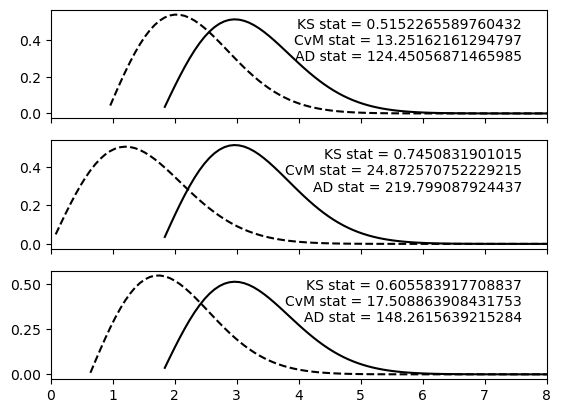

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.set_xlim([0,8])

ax0.text(0.95, 0.5, f'AD stat = {ad_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
ax0.text(0.95, 0.8, f'KS stat = {ks_output_vs_1[0]}', verticalalignment='bottom', horizontalalignment='right', transform=ax0.transAxes)
_ = qp.plotting.plot_native(ens_r_1[0], axes=ax0, color='black', linestyle='dashed')
_ = qp.plotting.plot_native(ens_r_single, axes=ax0, color='black')

ax1.text(0.95, 0.5, f'AD stat = {ad_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
ax1.text(0.95, 0.8, f'KS stat = {ks_output_vs_1[1]}', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes)
_ = qp.plotting.plot_native(ens_r_1[1], axes=ax1, color='black', linestyle='dashed')
_ = qp.plotting.plot_native(ens_r_single, axes=ax1, color='black')

ax2.text(0.95, 0.5, f'AD stat = {ad_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.65, f'CvM stat = {cvm_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
ax2.text(0.95, 0.8, f'KS stat = {ks_output_vs_1[2]}', verticalalignment='bottom', horizontalalignment='right', transform=ax2.transAxes)
_ = qp.plotting.plot_native(ens_r_1[2], axes=ax2, color='black', linestyle='dashed')
_ = qp.plotting.plot_native(ens_r_single, axes=ax2, color='black')

Note that because we are sampling from distributions in one Ensemble, the calculation is not symmetric.

In [10]:
output_1_then_2 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_2,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )


# Here, the order of the input variables has changed from ens_r_1, ens_r_2 to ens_r_2, ens_r_1
output_2_then_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_2,
            ens_r_1,
            fit_metric='ad',
            num_samples=rvs_size,
            _random_state=random_state
        )

If the calculation were symmetric, we would expect the difference between the two outputs to be approximately [0,0,0].

In [11]:
print(output_1_then_2 - output_2_then_1)

[-54.4934426    0.15982954   1.59046484]


This also implies that, because we sample from the distributions, the number of random variates requested will affect the output. 
Below we compare distributions of a single Ensemble pair-wise against themselves. As we increase the value for `num_samples` the resulting Kolmogorov-Smirnov value trends toward 0.

In [12]:
output_1 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=1,
            _random_state=random_state
        )

output_10 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=10,
            _random_state=random_state
        )

output_100 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=100,
            _random_state=random_state
        )

output_1000 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=1_000,
            _random_state=random_state
        )

output_10000 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=10_000,
            _random_state=random_state
        )

output_100000 = qp.metrics.calculate_goodness_of_fit(
            ens_r_1,
            ens_r_1,
            fit_metric='ks',
            num_samples=100_000,
            _random_state=random_state
        )

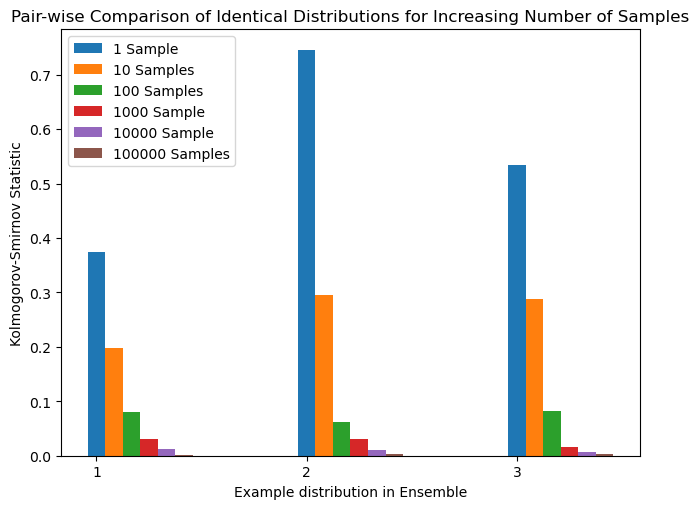

In [13]:
labels = ['1', '2', '3']
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.5/6
ax.bar(x + width*0, output_1, width, label='1 Sample')
ax.bar(x + width*1, output_10, width, label='10 Samples')
ax.bar(x + width*2, output_100, width, label='100 Samples')
ax.bar(x + width*3, output_1000, width, label='1000 Sample')
ax.bar(x + width*4, output_10000, width, label='10000 Sample')
ax.bar(x + width*5, output_100000, width, label='100000 Samples')

fig.tight_layout()
ax.set_title('Pair-wise Comparison of Identical Distributions for Increasing Number of Samples')
ax.set_xticks(x, labels)
ax.set_xlabel('Example distribution in Ensemble')
ax.set_ylabel('Kolmogorov-Smirnov Statistic')
ax.legend()
plt.show()